# Packages

In [1]:
using Pkg; Pkg.activate("."); 
using Revise
import TSO
using PyPlot

  Activating environment at `/cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/Project.toml`


# TurboS table for comparison

In [2]:
eosTSO       = TSO.reload(TSO.SqEoS, "../../../tests/TSO_sun_Magg_v10.2/eos.hdf5")
opacitiesTSO = TSO.reload(TSO.SqOpacity, "../../../tests/TSO_sun_Magg_v10.2/binned_opacities.hdf5");

# Read the AESOPUS tables for comparison

In [3]:
pathE = "EOS_OPACITY_MPIA/enthalpy_z0.0165_x0.7_MBS22_n1458.tab"
pathE2 = "eos_z0/ener_z0.0165_x0.7_MBS22_n1458_ext.tab"
pathK = "EOS_OPACITY_MPIA/kross_z0.0165_x0.7_MBS22_n1458.tab"
pathN = "EOS_OPACITY_MPIA/nelec_z0.0165_x0.7_MBS22_n1458.tab"
pathP = "EOS_OPACITY_MPIA/pgas_z0.0165_x0.7_MBS22_n1458.tab"
pathS = "EOS_OPACITY_MPIA/sigma_z0.0165_x0.7_MBS22_n5365-001.tab";

In [4]:
eosAESO   = TSO.AesopusEoS(energy=pathE, kross=pathK, pg=pathP, ne=pathN)
eosAESO2  = TSO.AesopusEoS(energy=pathE2, kross=pathK, pg=pathP, ne=pathN)
opaAESO   = TSO.AesopusOpacity(eosAESO, sigma=pathS)
eosAESO_e = TSO.energy_grid(eosAESO);

┌ Info: false
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_aesopus.jl:147
┌ Info: true
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_aesopus.jl:148
┌ Info: (185, 201, 5776)
└ @ TSO /cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/src/_aesopus.jl:149


# Compare the EoS

In [5]:
get_closest(a, b) = argmin(abs.(a .- b)) 

get_closest (generic function with 1 method)

In [6]:
rho_test = 1e-8
iTSO  = get_closest(eosTSO.lnRho,  log(rho_test))
iAESO = get_closest(eosAESO.lnRho, log(rho_test));

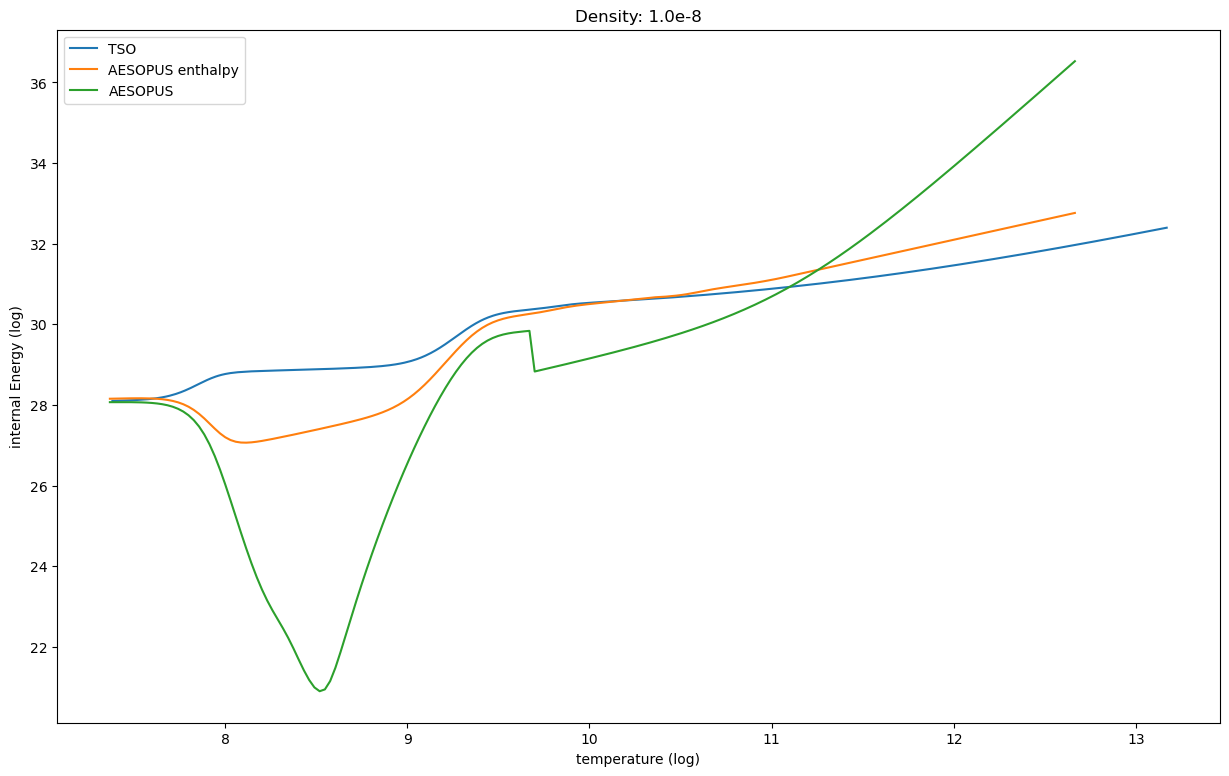

In [7]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnEi, label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS enthalpy")
ax.plot(eosAESO.lnT, eosAESO2.lnEi[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

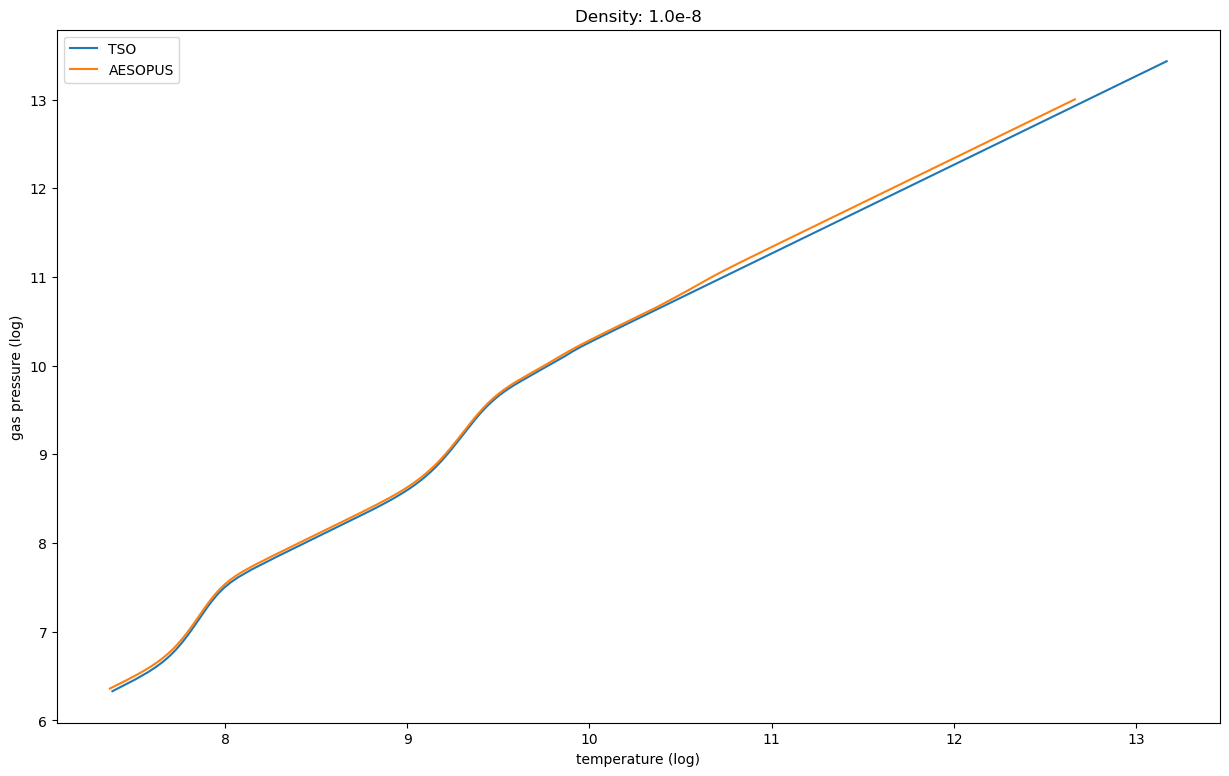

In [8]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnPg[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

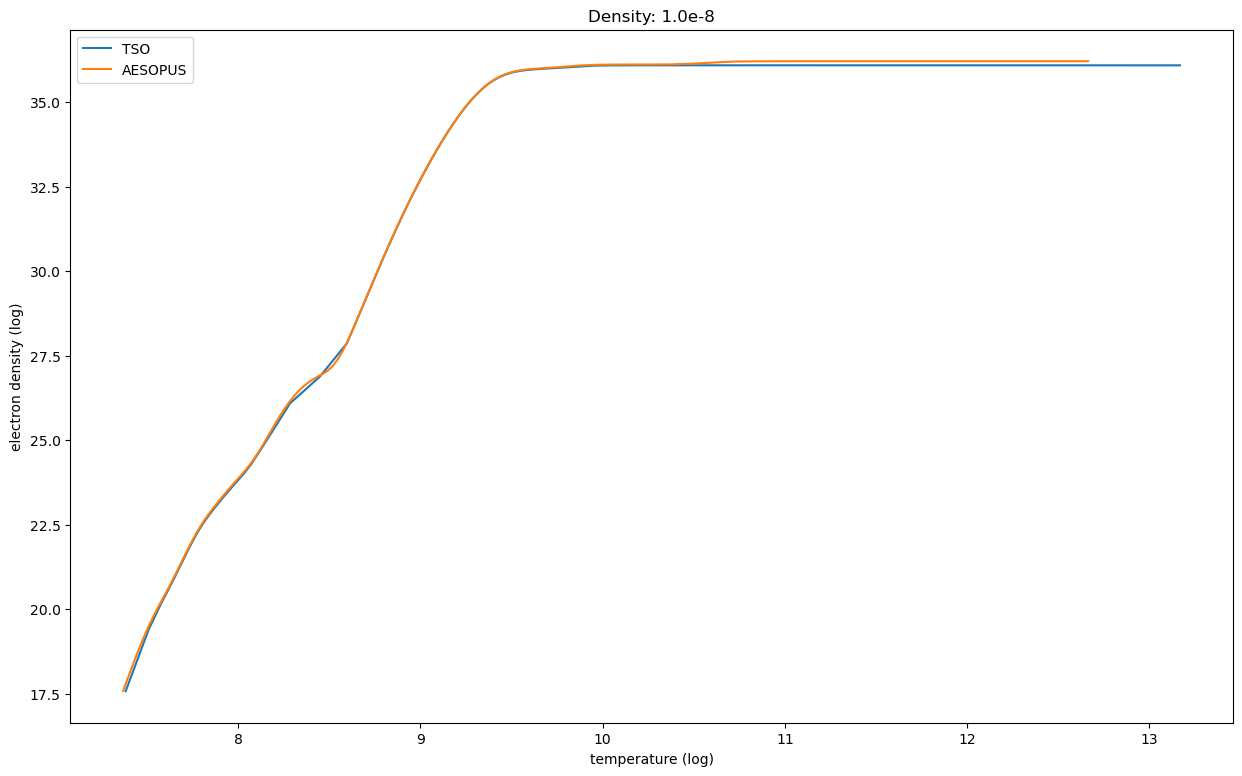

In [9]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnNe[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

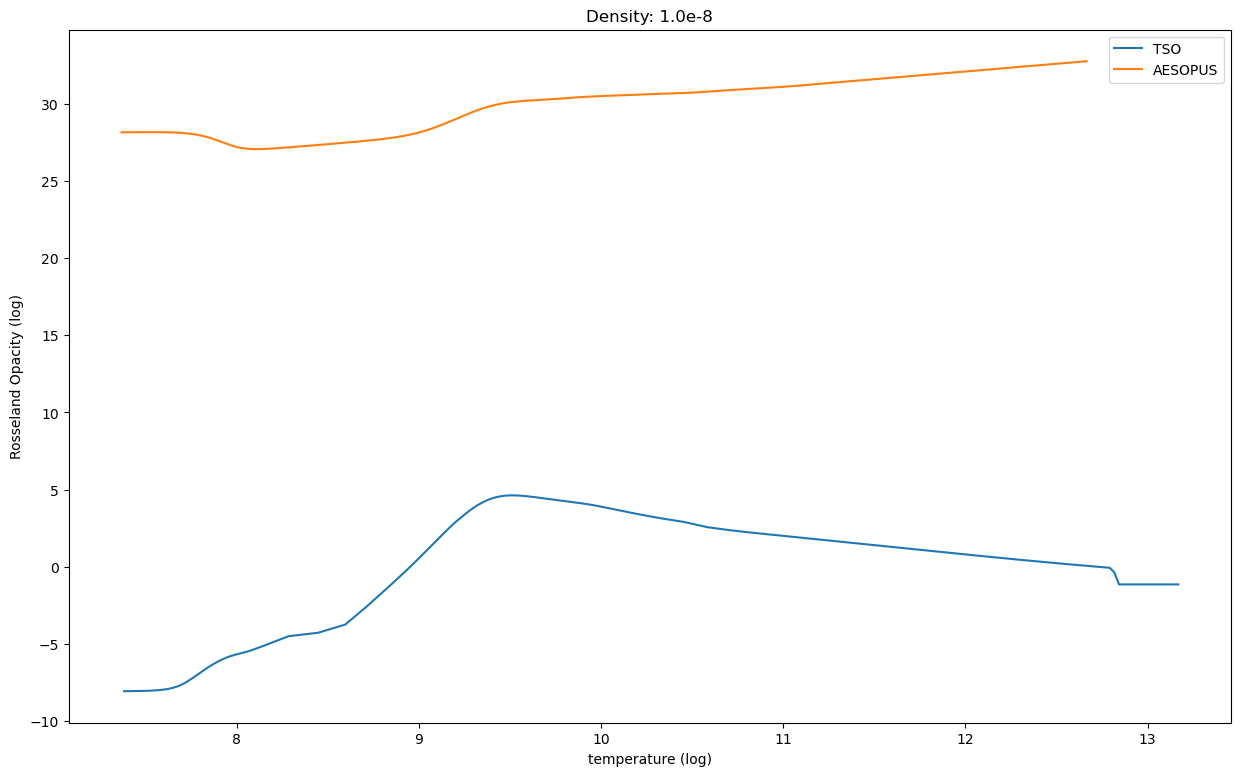

In [10]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnRoss[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnRoss[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("Rosseland Opacity (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

# Compare the Opacities

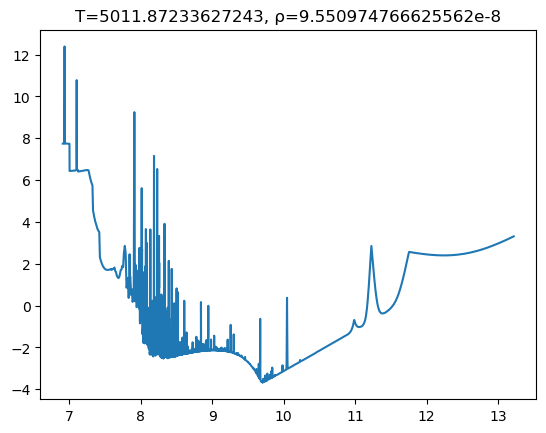

In [11]:
T, r, l, κ = opaAESO;

it = get_closest(T, log(5000.))
ir = get_closest(r, log(1e-7))


close()

## Title
plt.title("T=$(exp(T[it])), ρ=$(exp(r[ir]))")

## plot
plt.plot(l, κ[it, ir, :])

gcf()

In [12]:
magg = [12.000
       10.930
        1.050
        1.380
        2.700
        8.560
        7.980
        8.770
        4.400
        8.150
        6.290
        7.550
        6.430
        7.590
        5.410
        7.160
        5.250
        6.500
        5.140
        6.370
        3.070
        4.940
        3.890
        5.740
        5.520
        7.500
        4.950
        6.240
        4.210
        4.600
        2.880
        3.580
        2.290
        3.330
        2.560
        3.250
        2.600
        2.920
        2.210
        2.580
        1.420
        1.920
        1.840
        1.120
        1.660
        0.940
        1.770
        1.600
        2.000
        1.000
        2.190
        1.510
        2.240
        1.070
        2.170
        1.130
        1.700
        0.580
        1.450
        1.000
        0.520]

61-element Vector{Float64}:
 12.0
 10.93
  1.05
  1.38
  2.7
  8.56
  7.98
  8.77
  4.4
  8.15
  ⋮
  2.24
  1.07
  2.17
  1.13
  1.7
  0.58
  1.45
  1.0
  0.52

In [21]:
zx = 0.0
for i in eachindex(magg)
    if i >2
        zx += exp10(magg[i] .-12) * TSO.mass_u(i)
    end
end

yx = exp10(magg[2] .-12) * TSO.mass_u(:He) / TSO.mass_u(:H)

0.3379827883477514

In [22]:
zx / TSO.mass_u(:H)

0.022496374055485026

In [28]:
x = 1 / (1+yx+zx)

0.7349382894360799

In [29]:
y = yx * x

0.24839649232713304

In [32]:
z = zx * x

0.016665218236787186

In [33]:
x + y + z

1.0